In [1]:
from astropy.modeling.models import BlackBody
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from astropy.wcs import WCS
# specutils packages
from specutils import Spectrum1D
from specutils.analysis import line_flux
from specutils.fitting import fit_generic_continuum
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import centroid
from specutils.analysis import moment
from specutils.manipulation import extract_region
import warnings
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f23babd7130>

In [2]:
hdu = fits.open("../Spectra-lamostdr7/spec-56581-VB031N50V1_sp08-218.fits")
hdudata = hdu[0].data
wl = hdudata[2]
Flux = hdudata[0]

In [3]:
# Defining units astropy
rel_flux = u.def_unit('Relative~flux')
rel_flux.decompose()

Unit("Relative~flux")

In [4]:
lamb = wl * u.AA 
flux = Flux * rel_flux
spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

In [5]:
from dust_extinction.parameter_averages import F99

# define the model
ext = F99(Rv=3.1)

In [6]:
# extinguish (redden) the spectrum
spectrum_ext = spec.flux*ext.extinguish(spec.spectral_axis, Ebv=0.5)

In [7]:
spec_ext = Spectrum1D(spectral_axis=lamb, flux=spectrum_ext)

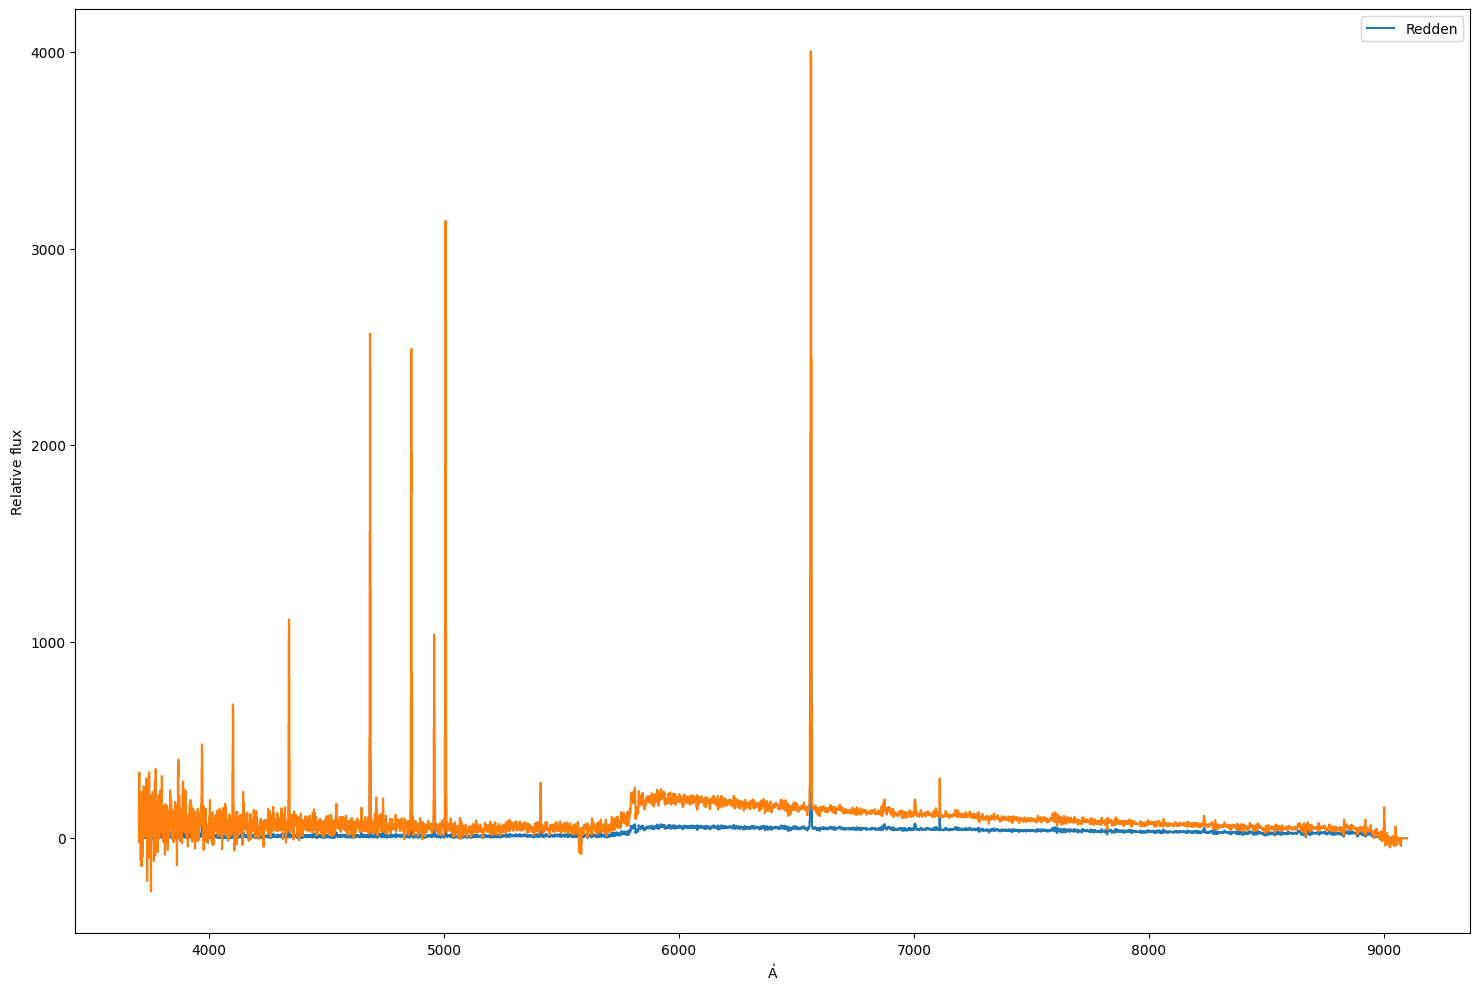

In [8]:
f, ax = plt.subplots(figsize=(18,12))  
ax.step(spec_ext.spectral_axis, spec_ext.flux, label="Redden") 
ax.step(spec.spectral_axis, spec.flux)
plt.legend()

In [24]:
Rv=3.1
Ev = 0.17773729496055896
Av = Ev*Rv

In [25]:
# unextinguish (deredden) the spectrum
spectrum_noext = spec.flux/ext.extinguish(spec.spectral_axis, Av=Av)
spec_noext = Spectrum1D(spectral_axis=lamb, flux=spectrum_noext)

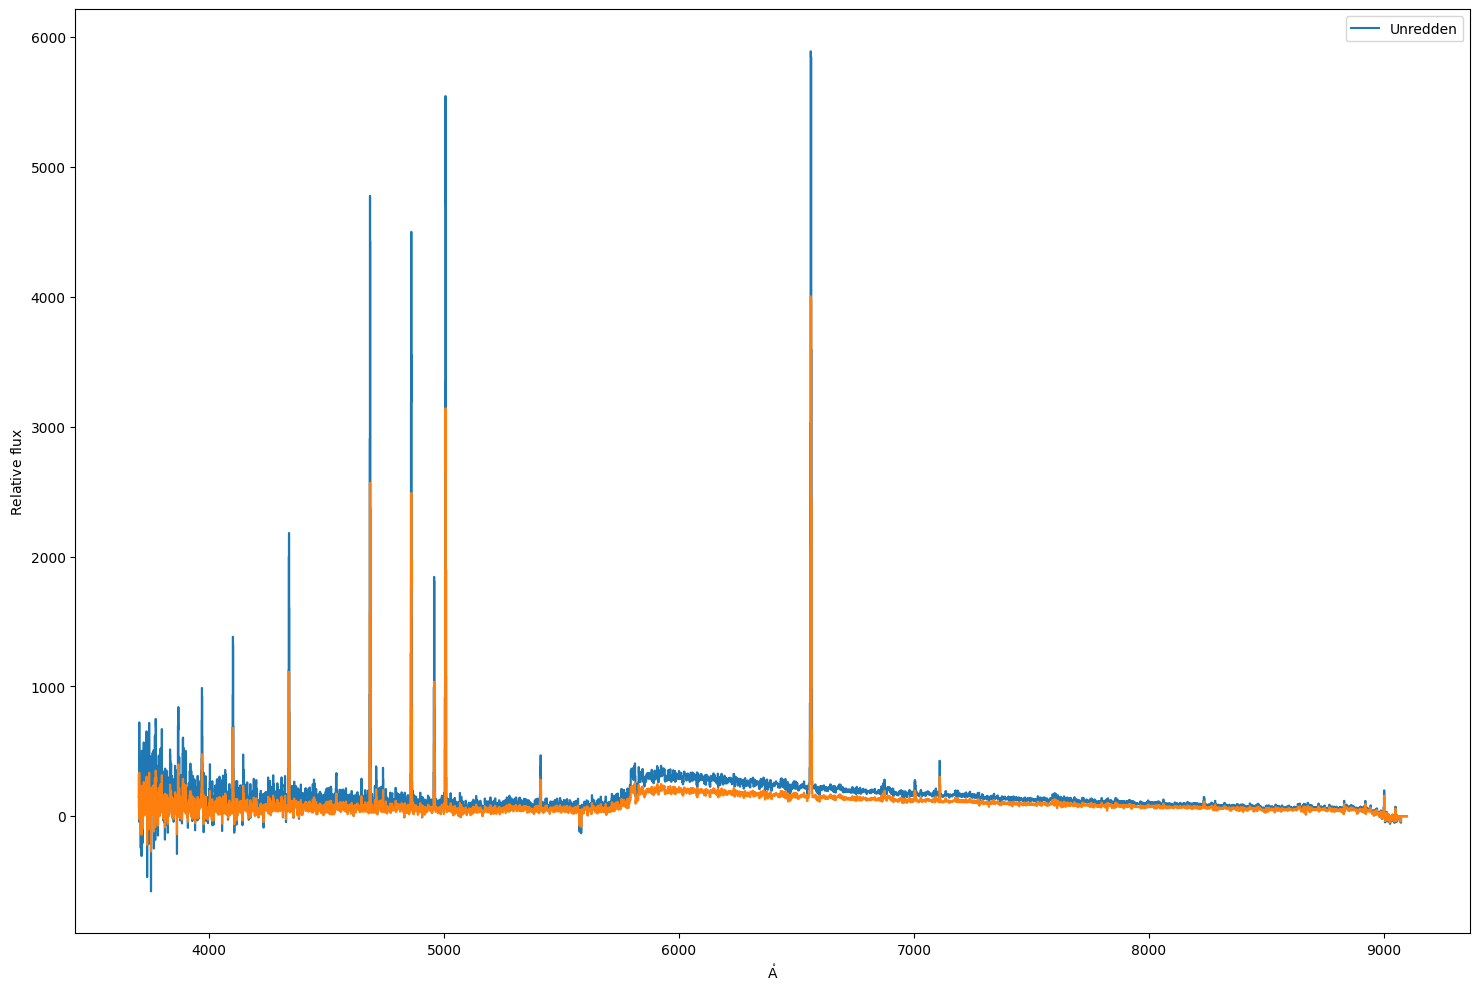

In [26]:
f, ax = plt.subplots(figsize=(18,12))  
ax.step(spec_noext.spectral_axis, spec_noext.flux, label="Unredden") 
ax.step(spec.spectral_axis, spec.flux)
plt.legend()